In [1]:
import matplotlib.pyplot as plt
import numpy

numpy.random.seed(0)

In [2]:
from gaitmap.example_data import get_healthy_example_imu_data

data = get_healthy_example_imu_data()
sampling_rate_hz = 204.8
data.sort_index(axis=1).head(1)

sensor left_sensor                                                   \
axis         acc_x     acc_y    acc_z     gyr_x     gyr_y     gyr_z   
0.0       0.880811  2.762208  9.40865 -0.112402 -0.032157 -0.062261   

sensor right_sensor                                                    
axis          acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  
0.0        0.311553 -2.398646  9.513275 -0.323037  0.084604 -0.025288

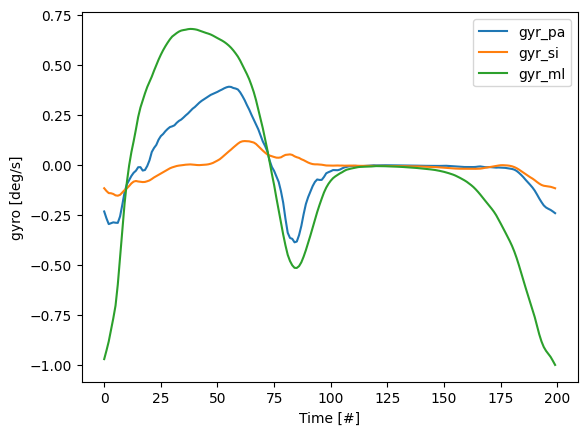

In [3]:
from gaitmap.stride_segmentation import BarthOriginalTemplate

template = BarthOriginalTemplate()
template.get_data().plot()
plt.xlabel("Time [#]")
plt.ylabel("gyro [deg/s]")
plt.show()

In [4]:
from gaitmap.utils.coordinate_conversion import convert_to_fbf

# We use the `..._like` parameters to identify the data of the left and the right foot based on the name of the sensor.
bf_data = convert_to_fbf(data, left_like="left_", right_like="right_")

In [5]:
from gaitmap.stride_segmentation import BarthDtw

dtw = BarthDtw(template=template)
# Apply the dtw to the data
dtw = dtw.segment(data=bf_data, sampling_rate_hz=sampling_rate_hz)

In [6]:
stride_list_left = dtw.stride_list_["left_sensor"]
print(f"{len(stride_list_left)} strides were detected.")
stride_list_left.head()

28 strides were detected.


,start,end
s_id,,
0,364,584
1,584,802
2,802,1023
3,1023,1242
4,1242,1458


C:\Users\B Vasundhara\AppData\Local\Temp\ipykernel_12280\1910533443.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


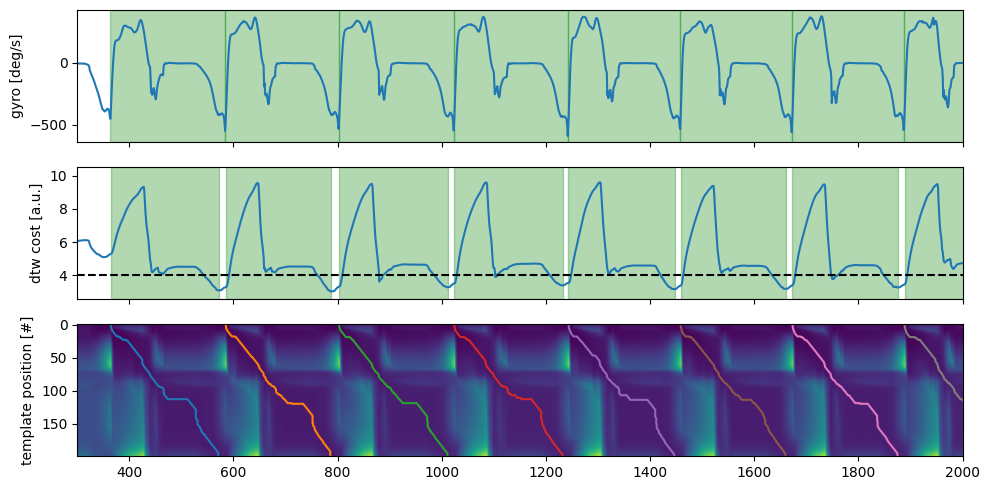

In [7]:
sensor = "left_sensor"
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10, 5))
dtw.data[sensor]["gyr_ml"].reset_index(drop=True).plot(ax=axs[0])
axs[0].set_ylabel("gyro [deg/s]")
axs[1].plot(dtw.cost_function_[sensor])
axs[1].set_ylabel("dtw cost [a.u.]")
axs[1].axhline(dtw.max_cost, color="k", linestyle="--")
axs[2].imshow(dtw.acc_cost_mat_[sensor], aspect="auto")
axs[2].set_ylabel("template position [#]")
for p in dtw.paths_[sensor]:
    axs[2].plot(p.T[1], p.T[0])
for s in dtw.matches_start_end_original_[sensor]:
    axs[1].axvspan(*s, alpha=0.3, color="g")
for _, s in dtw.stride_list_[sensor][["start", "end"]].iterrows():
    axs[0].axvspan(*s, alpha=0.3, color="g")

axs[0].set_xlim(300, 2000)
axs[0].set_xlabel("time [#]")
fig.tight_layout()
fig.show()